In [0]:
#decision tree and random forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


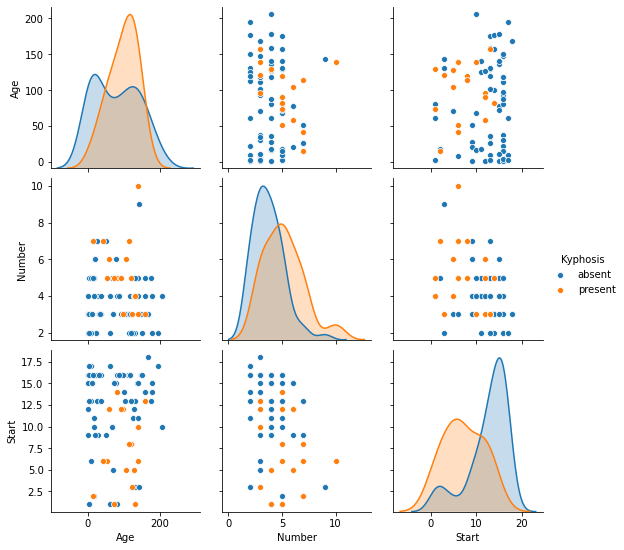

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#training single decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier() #instantiate

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.95      0.91      0.93        22
     present       0.50      0.67      0.57         3

    accuracy                           0.88        25
   macro avg       0.73      0.79      0.75        25
weighted avg       0.90      0.88      0.89        25



In [24]:
print(confusion_matrix(y_test,pred))

[[20  2]
 [ 1  2]]


In [0]:
#random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=100)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      0.95      0.95        22
     present       0.67      0.67      0.67         3

    accuracy                           0.92        25
   macro avg       0.81      0.81      0.81        25
weighted avg       0.92      0.92      0.92        25



[[21  1]
 [ 1  2]]


In [26]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [0]:
#Visualizing Decision Tree
from sklearn.tree import export_graphviz

In [0]:
export_graphviz(dtree,'tree.dot',feature_names=X.columns)

In [0]:
! dot -Tpng tree.dot -o tree.png

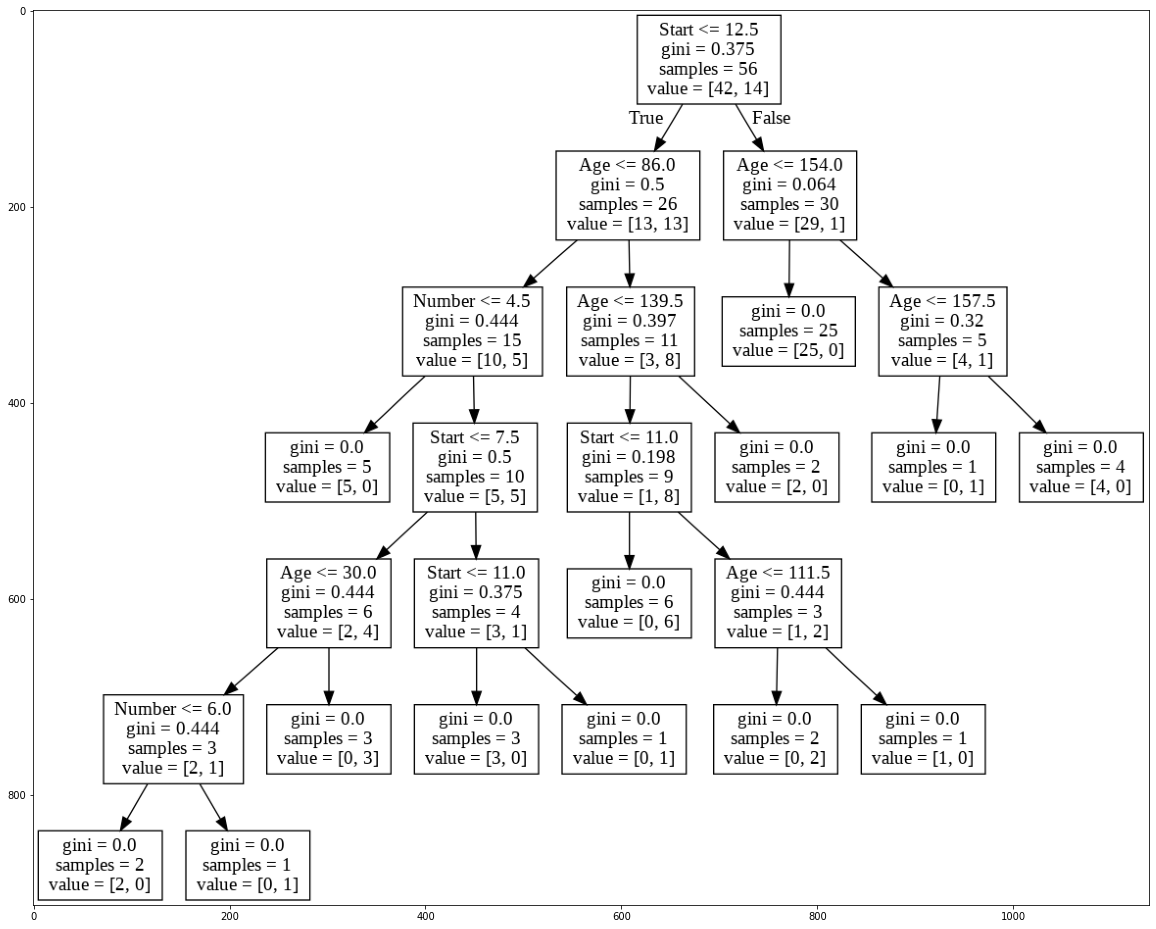

In [37]:
import cv2
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)